In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Create subplots for each year
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Get the maximum value across all years for setting a common y-axis limit
max_value = 150
lettersize=7

# Plot the total area for each crop in 2019
sns.barplot(x='Perm_crop', y='Area_2019', data=data, ax=axes[0, 0])
axes[0, 0].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[0, 0].set_ylabel('Area in 2019', fontsize=lettersize)
axes[0, 0].set_title('Total Area of Permanent Crops in 2019', fontsize=lettersize)
axes[0, 0].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[0, 0].tick_params(axis='y', labelsize=lettersize)
axes[0, 0].set_ylim([0, max_value])  # Set common y-axis limit

# Plot the total area for each crop in 2009
sns.barplot(x='Perm_crop', y='Area_2009', data=data, ax=axes[0, 1])
axes[0, 1].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[0, 1].set_ylabel('Area in 2009', fontsize=lettersize)
axes[0, 1].set_title('Total Area of Permanent Crops in 2009', fontsize=lettersize)
axes[0, 1].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[0, 1].tick_params(axis='y', labelsize=lettersize)
axes[0, 1].set_ylim([0, max_value])  # Set common y-axis limit

# Plot the total area for each crop in 1999
sns.barplot(x='Perm_crop', y='Area_1999', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[1, 0].set_ylabel('Area in 1999', fontsize=lettersize)
axes[1, 0].set_title('Total Area of Permanent Crops in 1999', fontsize=lettersize)
axes[1, 0].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[1, 0].tick_params(axis='y', labelsize=lettersize)
axes[1, 0].set_ylim([0, max_value])  # Set common y-axis limit

# Plot the total area for each crop in 1989
sns.barplot(x='Perm_crop', y='Area_1989', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[1, 1].set_ylabel('Area in 1989', fontsize=lettersize)
axes[1, 1].set_title('Total Area of Permanent Crops in 1989', fontsize=lettersize)
axes[1, 1].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[1, 1].tick_params(axis='y', labelsize=lettersize)
axes[1, 1].set_ylim([0, max_value])  # Set common y-axis limit

# Adjust the spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()


Bar chart of the Total Area of Permanent Crops by Year (of all Freguesias in Portugal):

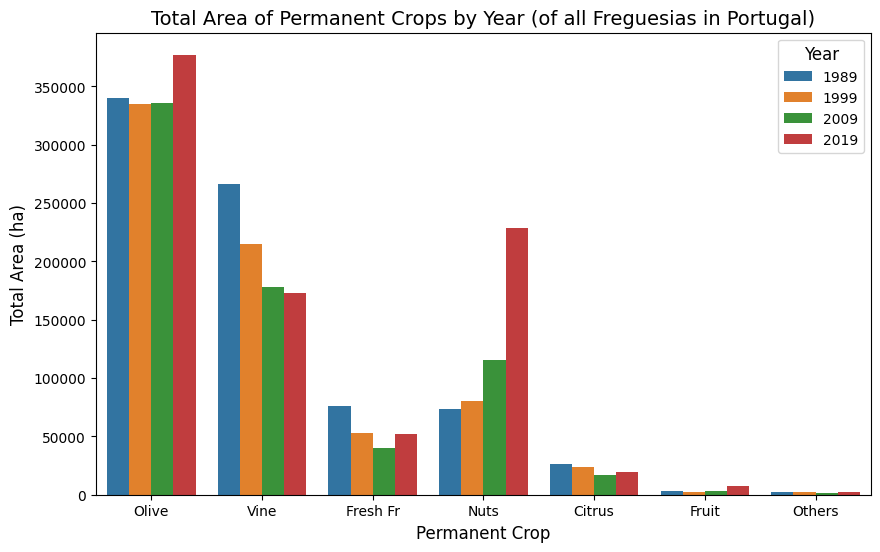

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Rename the columns
data.rename(columns={'Area_1989': '1989'}, inplace=True)
data.rename(columns={'Area_1999': '1999'}, inplace=True)
data.rename(columns={'Area_2009': '2009'}, inplace=True)
data.rename(columns={'Area_2019': '2019'}, inplace=True)

# Group the data by crop and calculate the total area for each crop
crop_totals_1989 = data.groupby('Perm_crop')[['1989', '1999', '2009', '2019']].sum().reset_index()

# Sort the data by total area in descending order
crop_totals_1989 = crop_totals_1989.sort_values('1989', ascending=False)

# Create custom abbreviations for x-axis labels
abbreviations = ['Olive', 'Vine', 'Fresh Fr', 'Nuts', 'Citrus', 'Fruit', 'Others']  # Update with desired abbreviations

# Add the abbreviations as a new column in crop_totals DataFrame
crop_totals_1989['Abbreviation'] = abbreviations

# Melt the data to convert the year columns into a single 'Year' column
melted_data = pd.melt(crop_totals_1989, id_vars=['Perm_crop', 'Abbreviation'], var_name='Year', value_name='Total_Area')

# Create a bar chart to visualize the total area for each crop over the years
plt.figure(figsize=(10, 6))
sns.barplot(x='Perm_crop', y='Total_Area', hue='Year', data=melted_data)
plt.xlabel('Permanent Crop', fontsize=12)
plt.ylabel('Total Area (ha)', fontsize=12)
plt.title('Total Area of Permanent Crops by Year (of all Freguesias in Portugal)', fontsize=14)
plt.xticks(range(len(crop_totals_1989)), abbreviations, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Year', fontsize=10, title_fontsize=12, loc='upper right')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Group the data by crop and calculate the sum of the areas for each year
crop_totals = data.groupby('Perm_crop')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum().reset_index()

# Set the crop names as the x-axis labels
crop_names = crop_totals['Perm_crop']

# Set the years
years = ['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']

# Create a list to store the heights of each stacked bar
bar_heights = []

# Calculate the sum of areas for each year and append to the bar heights list
for year in years:
    bar_heights.append(crop_totals[year].values)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(crop_names, bar_heights[0], label=years[0])
for i in range(1, len(years)):
    plt.bar(crop_names, bar_heights[i], bottom=sum(bar_heights[:i]), label=years[i])

# Add labels and title
plt.xlabel('Permanent Crop', fontsize=12)
plt.ylabel('Total Area', fontsize=12)
plt.title('Total Area of Permanent Crops by Year', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend(title='Year', fontsize=10, title_fontsize=12)

# Display the chart
plt.show()


In [ ]:
# Calculate the sum of areas for each year
crop_totals = data.groupby('Perm_crop')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum().reset_index()

# Set the crop column as the index
crop_totals.set_index('Perm_crop', inplace=True)

# Transpose the DataFrame to have years as columns
crop_totals = crop_totals.T


# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
crop_totals.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Area')
plt.title('Total Area of Crops by Year')
plt.xticks(rotation=0)
plt.legend(title='Crop', bbox_to_anchor=(1, 1))


plt.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Calculate proportions for each year
years = ['1989', '1999', '2009', '2019']
for year in years:
    data[f'Proportion_{year}'] = data[f'Area_{year}'] / data.groupby('NutsID')[f'Area_{year}'].transform('sum')

# Step 4: Changes over Time (Sankey Diagram)
fig = px.sunburst(data, path=['Perm_crop', 'NutsID'], values=[f'Proportion_{year}' for year in years])
fig.update_layout(title_text="Sankey Diagram of Agricultural Crop Changes Over Time")
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of the area for each region
sum_area = data.groupby('region_name')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum()

# Step 3: Create the line plot
years = ['1989', '1999', '2009', '2019']
regions = sum_area.index

for region in regions:
    plt.plot(years, sum_area.loc[region], label=region)

plt.xlabel('Years')
plt.ylabel('Total Area')
plt.title('Total Area of Crops in Each Region Over Time')
#plt.legend()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Step 2: Calculate the sum of all crops for each region
sum_crops = data.groupby('region_name')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum().sum(axis=1)

# Step 3: Create the heat map
heatmap_data = sum_crops.values.reshape(-1, 1)
regions = sum_crops.index

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data)
plt.xlabel('Years')
plt.ylabel('Region')
plt.title('Total Sum of All Crops for Each Region')
plt.show()


C:\Users\alfor\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alfor\AppData\Local\Temp\ipykernel_11168\660109568.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Cluster'] = kmeans.labels_


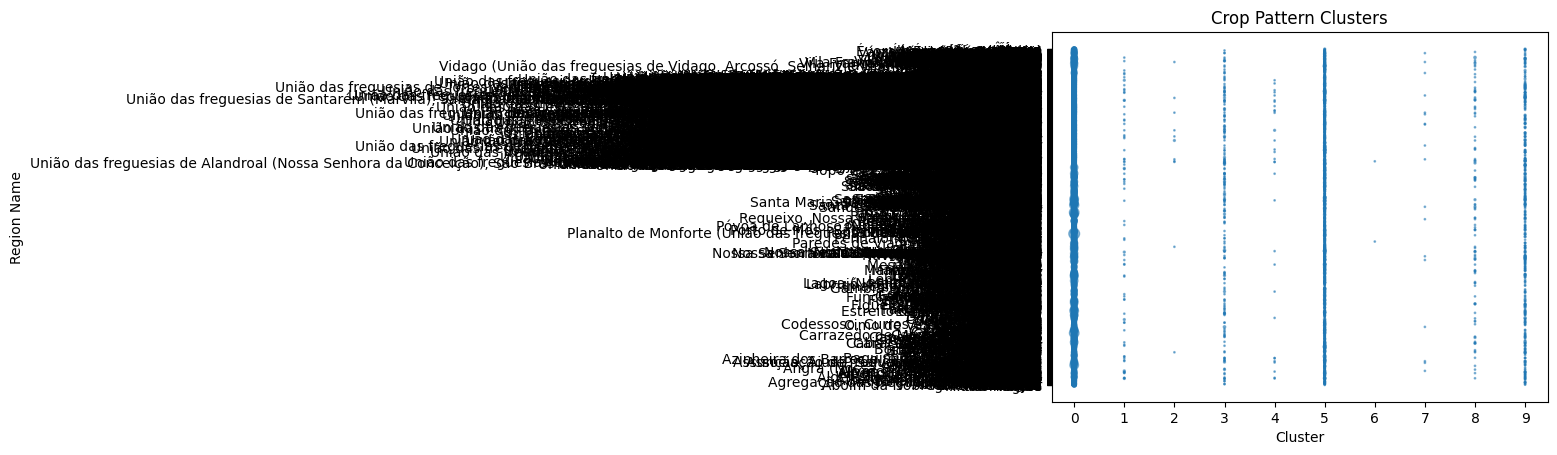

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Read the database into a DataFrame
data = pd.read_csv("3_temp_crops.csv")

# Encode the categorical columns
label_encoder = LabelEncoder()
data['Encoded_temp_crop'] = label_encoder.fit_transform(data['Temp_crop'])

# Select the relevant columns for clustering
crop_data = data[['region_name', 'Encoded_temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']]

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crop_data.iloc[:, 5:])

# Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame
crop_data['Cluster'] = kmeans.labels_

# Group the data by cluster and region_name
grouped_data = crop_data.groupby(['Cluster', 'region_name']).size().reset_index(name='Count')

# Plot the clusters
plt.scatter(grouped_data['Cluster'], grouped_data['region_name'], s=grouped_data['Count'], alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Region Name')
plt.title('Crop Pattern Clusters')
plt.xticks(range(10))
plt.show()
